# **TP Qualité des données**
##**Groupe :** 
CARIBEAUX Clémence

LOSSEC Pascal

GARO Maëlik

VILAIN Corto

BREMOND Thomas

# Import Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Bibliothèques pour Cross validation

#Affichage de Graphes
from IPython.display import Markdown, display, HTML

#Scipy 
import scipy 
from scipy import misc
import matplotlib.pyplot as plt
import scipy.stats as scp_stats

In [3]:
train = pd.read_csv('drive/My Drive/Data/climat_si.csv', sep=';', encoding = "ISO-8859-1")
train

,janvier,février,mars,avril,mai,juin,juillet,août,septembre,octobre,novembre,décembre
0,-5,-7.0,-7,2.0,12,17.0,20,20,16.0,6,0.0,-6
1,-6,-6.0,-8,3.0,14,16.0,20,19,14.0,2,1.0,-4
2,-5,-5.0,-5,4.0,15,17.0,17,19,15.0,3,2.0,-8
3,-3,-6.0,-3,6.0,16,14.0,18,18,13.0,4,3.0,-9
4,-6,-8.0,-2,4.0,13,15.0,17,17,12.0,3,4.0,-9
5,-11,-9.0,1,5.0,12,17.0,17,18,10.0,2,3.0,-9
6,-6,5.0,2,4.0,8,17.0,16,16,12.0,4,4.0,-8
7,-8,-11.0,1,6.0,7,15.0,17,17,11.0,5,5.0,-4
8,-11,-12.0,1,7.0,6,14.0,17,15,11.0,3,5.0,-3
9,-8,-9.0,2,7.0,5,15.0,15,14,12.0,4,-1.0,-8


In [4]:
#Conversion des données en float
train = train.astype(float)
train

,janvier,février,mars,avril,mai,juin,juillet,août,septembre,octobre,novembre,décembre
0,-5.0,-7.0,-7.0,2.0,12.0,17.0,20.0,20.0,16.0,6.0,0.0,-6.0
1,-6.0,-6.0,-8.0,3.0,14.0,16.0,20.0,19.0,14.0,2.0,1.0,-4.0
2,-5.0,-5.0,-5.0,4.0,15.0,17.0,17.0,19.0,15.0,3.0,2.0,-8.0
3,-3.0,-6.0,-3.0,6.0,16.0,14.0,18.0,18.0,13.0,4.0,3.0,-9.0
4,-6.0,-8.0,-2.0,4.0,13.0,15.0,17.0,17.0,12.0,3.0,4.0,-9.0
5,-11.0,-9.0,1.0,5.0,12.0,17.0,17.0,18.0,10.0,2.0,3.0,-9.0
6,-6.0,5.0,2.0,4.0,8.0,17.0,16.0,16.0,12.0,4.0,4.0,-8.0
7,-8.0,-11.0,1.0,6.0,7.0,15.0,17.0,17.0,11.0,5.0,5.0,-4.0
8,-11.0,-12.0,1.0,7.0,6.0,14.0,17.0,15.0,11.0,3.0,5.0,-3.0
9,-8.0,-9.0,2.0,7.0,5.0,15.0,15.0,14.0,12.0,4.0,-1.0,-8.0


# Statistiques

In [5]:
#Affichage des moyennes par mois
for t in train.columns:
  print("Moyenne du mois " + t + " : " + str(np.mean(train[t])))

Moyenne du mois janvier : -8.96774193548387
Moyenne du mois février : -4.928571428571429
Moyenne du mois mars : 1.1935483870967742
Moyenne du mois avril : 8.0
Moyenne du mois mai : 12.903225806451612
Moyenne du mois juin : 17.033333333333335
Moyenne du mois juillet : 18.322580645161292
Moyenne du mois août : 17.838709677419356
Moyenne du mois septembre : 10.5
Moyenne du mois octobre : 3.870967741935484
Moyenne du mois novembre : -0.3333333333333333
Moyenne du mois décembre : -7.0


In [6]:
#Affichage des écarts types par mois
for t in train.columns:
  print("Ecart Type du mois " + t + " : " + str(np.std(train[t])))

Ecart Type du mois janvier : 4.417588533298652
Ecart Type du mois février : 4.479545348650044
Ecart Type du mois mars : 3.4493510828589167
Ecart Type du mois avril : 3.0983866769659336
Ecart Type du mois mai : 3.970494717771346
Ecart Type du mois juin : 2.960668092771555
Ecart Type du mois juillet : 3.5139087396506374
Ecart Type du mois août : 2.653017444509947
Ecart Type du mois septembre : 2.29128784747792
Ecart Type du mois octobre : 1.7733135647593228
Ecart Type du mois novembre : 3.6545253529775312
Ecart Type du mois décembre : 2.032002032003048


In [7]:
#Affichage des minimums par mois
for t in train.columns:
  print("Minimum du mois " + t + " : " + str(np.min(train[t])))

Minimum du mois janvier : -23.0
Minimum du mois février : -12.0
Minimum du mois mars : -8.0
Minimum du mois avril : 2.0
Minimum du mois mai : 5.0
Minimum du mois juin : 11.0
Minimum du mois juillet : 13.0
Minimum du mois août : 14.0
Minimum du mois septembre : 6.0
Minimum du mois octobre : 1.0
Minimum du mois novembre : -8.0
Minimum du mois décembre : -11.0


In [8]:
#Affichage des maximums par mois
for t in train.columns:
  print("Maximum du mois " + t + " : " + str(np.max(train[t])))

Maximum du mois janvier : -3.0
Maximum du mois février : 5.0
Maximum du mois mars : 7.0
Maximum du mois avril : 16.0
Maximum du mois mai : 18.0
Maximum du mois juin : 22.0
Maximum du mois juillet : 26.0
Maximum du mois août : 26.0
Maximum du mois septembre : 16.0
Maximum du mois octobre : 7.0
Maximum du mois novembre : 5.0
Maximum du mois décembre : -3.0


In [9]:
#Maximum de l'année
np.nanmax(train)

26.0

In [10]:
#Minimum de l'année
np.nanmin(train)

-23.0

# Graphiques

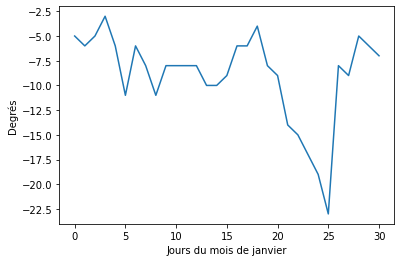

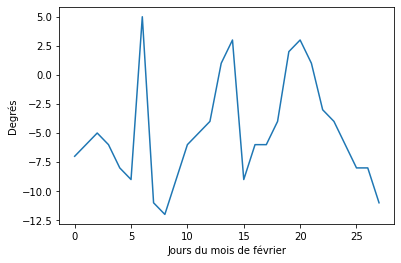

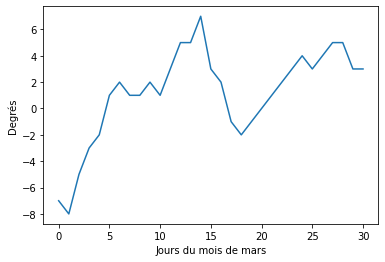

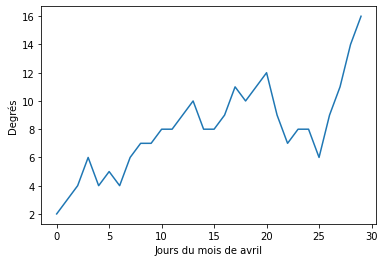

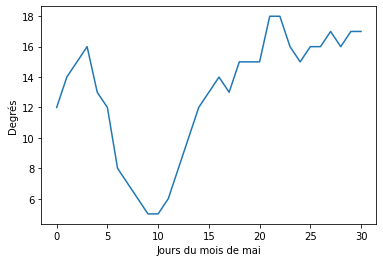

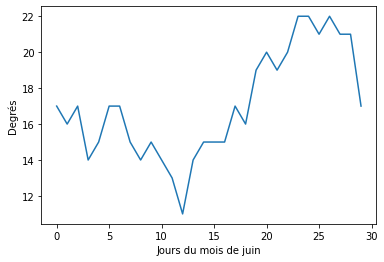

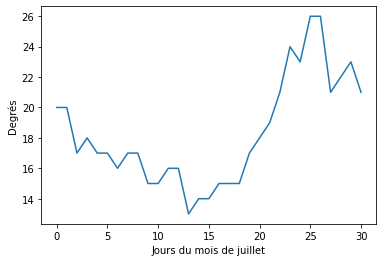

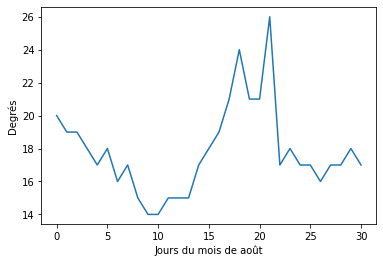

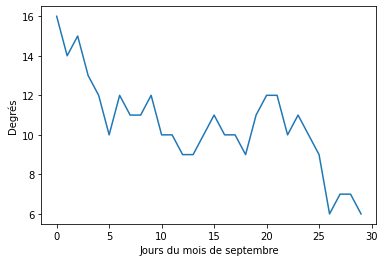

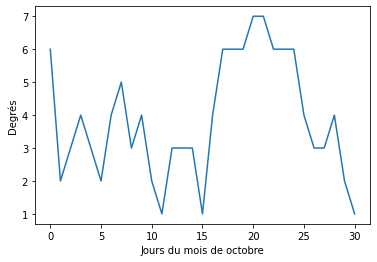

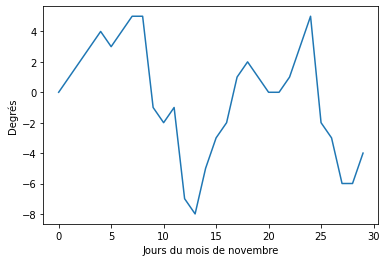

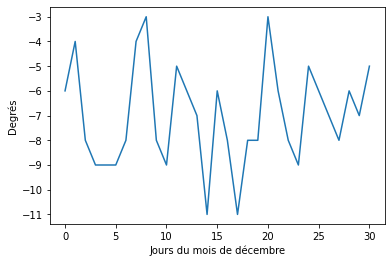

In [11]:
#Affichage des courbes par mois

import matplotlib.pyplot as plt

for t in train.columns:
  days = np.arange(len(train[t]))
  plt.plot(days, train[t])
  plt.xlabel('Jours du mois de ' + t)
  plt.ylabel('Degrés')
  plt.show()

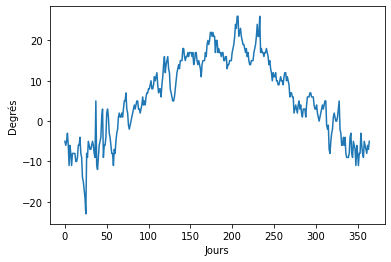

In [12]:
#Courbe annuelle

train_annu = list()

for t in train.columns:
  train_annu.extend(train[t])

train_annu = [jours for jours in train_annu if str(jours) != 'nan']

days = np.arange(len(train_annu))
plt.plot(days, train_annu)
plt.xlabel('Jours')
plt.ylabel('Degrés')

plt.show()

In [13]:
#Courbe à l'aide du pointeur
import plotly.express as px


train_annu = list()

for t in train.columns:
  train_annu.extend(train[t])

train_annu = [jours for jours in train_annu if str(jours) != 'nan']

days = np.arange(len(train_annu))

fig = px.line(train_annu, x=days, y=train_annu, title='Courbe à l\'aide du pointeur')
fig.show()

In [26]:
train_error = pd.read_csv('drive/My Drive/Data/si-erreur.csv', sep=';', encoding = "ISO-8859-1")
train_error

,janvier,fvrier,mars,avril,mai,juin,juillet,aot,septembre,octobre,novembre,dcembre
0,-5,-7.0,-7,2.0,12,17,20,20,16.0,6,0.0,-6
1,-6,-6.0,-8,3.0,14,16,20,19,14.0,2,1.0,-4
2,-5,-5.0,-5,4.0,15,17,17,19,15.0,3,2.0,-8
3,-3,-6.0,-3,6.0,16,14,18,18,13.0,4,3.0,-9
4,-6,-8.0,-2,4.0,13,15,17,17,12.0,3,4.0,-9
5,-11,-9.0,1,5.0,12,17,17,18,10.0,2,3.0,-9
6,-6,5.0,2,4.0,8,17,16,16,12.0,4,4.0,-8
7,-8,-11.0,1,6.0,7,15,17,17,11.0,0xFFFF,5.0,-4
8,-11,-12.0,1,7.0,6,14,17,15,11.0,3,5.0,-3
9,-8,-9.0,2,7.0,5,Sun,15,14,12.0,4,-1.0,-8


In [37]:
#Conversion des données en float
import random

for t in train_error.columns:
  for i, row_value in train_error[t].iteritems():
    if(isinstance(row_value, (int))):
      train_error[t][i] = float(row_value)
    elif(not isinstance(row_value, (float))):
      train_error[t][i] = random.uniform(0, 15)

train_error

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,janvier,fvrier,mars,avril,mai,juin,juillet,aot,septembre,octobre,novembre,dcembre
0,-5,0.263567,0.212869,0.941718,12,0.0865934,0.665694,20,0.908736,0.933299,0.996803,-6
1,-6,0.424200,0.0165573,0.680918,14,0.120604,0.522121,19,0.510139,0.467649,0.990818,-4
2,-5,0.569668,0.175076,0.461912,15,0.53889,0.710222,19,0.210437,0.147007,0.584987,-8
3,-3,0.014950,0.646174,0.721312,16,0.176713,0.558935,18,0.966664,0.753565,0.933262,-9
4,-6,0.022646,0.412246,0.425630,13,0.552527,0.401561,17,0.901232,0.760495,0.085310,-9
5,-11,0.117661,0.690389,0.836126,12,0.698879,0.178117,18,0.134460,0.815669,0.272257,-9
6,-6,0.265461,0.448725,0.592027,8,0.78242,0.37403,16,0.721840,0.923799,0.942655,-8
7,-8,0.618577,0.48216,0.257770,7,0.277828,0.84828,17,0.026288,0.389615,0.771505,-4
8,-11,0.126251,0.711053,0.380324,6,0.162044,0.565672,15,0.102298,0.999927,0.381535,-3
9,-8,0.817459,0.326112,0.048384,5,0.940158,0.529136,14,0.008684,0.130229,0.819652,-8


Statistiques avec erreur

In [35]:
#Affichage des moyennes par mois
for t in train_error.columns:
  print("Moyenne du mois " + t + " : " + str(np.mean(train_error[t])))

Moyenne du mois janvier : -8.96774193548387
Moyenne du mois fvrier : 0.44598465116787905
Moyenne du mois mars : 0.46672776379805103
Moyenne du mois avril : 0.4938745410220306
Moyenne du mois mai : 12.903225806451612
Moyenne du mois juin : 0.46674818068405893
Moyenne du mois juillet : 0.5494722012527535
Moyenne du mois aot : 18.838709677419356
Moyenne du mois septembre : 0.42574002966988705
Moyenne du mois octobre : 0.5387705142632659
Moyenne du mois novembre : 0.5522287075729911
Moyenne du mois dcembre : -7.967741935483871


In [41]:
#Affichage des écarts types par mois
for t in train_error.columns:
  print("Ecart Type du mois " + t + " : " + str(np.std(train_error[t])))

Ecart Type du mois janvier : 4.417588533298652
Ecart Type du mois fvrier : 0.2733169489618324
Ecart Type du mois mars : 0.2808925490912498
Ecart Type du mois avril : 0.2615035696513159
Ecart Type du mois mai : 3.970494717771346
Ecart Type du mois juin : 0.2984018629621456
Ecart Type du mois juillet : 0.24946848772103095
Ecart Type du mois aot : 5.946518494550856
Ecart Type du mois septembre : 0.3290764914076969
Ecart Type du mois octobre : 0.3245532699261726
Ecart Type du mois novembre : 0.32027753607609905
Ecart Type du mois dcembre : 4.948012771306843


In [40]:
#Affichage des minimums par mois
for t in train_error.columns:
  print("Minimum du mois " + t + " : " + str(np.min(train_error[t])))

Minimum du mois janvier : -23
Minimum du mois fvrier : 0.010240106603318866
Minimum du mois mars : 0.016557263404685663
Minimum du mois avril : 0.048383919737721826
Minimum du mois mai : 5
Minimum du mois juin : 0.011185959091372877
Minimum du mois juillet : 0.003641793153943862
Minimum du mois aot : 14
Minimum du mois septembre : 0.008683781144555813
Minimum du mois octobre : 0.022702041484368052
Minimum du mois novembre : 0.0030338323750933593
Minimum du mois dcembre : -33


In [38]:
#Maximum de l'année
np.nanmax(train_error)

48

In [39]:
#Minimum de l'année
np.nanmin(train_error)

-33